importing mask: /home/aroman/data/mask/planck_foreground.npy
planck mask range: 0.0 1.0000000000000002
0.0 1.0000000000000002


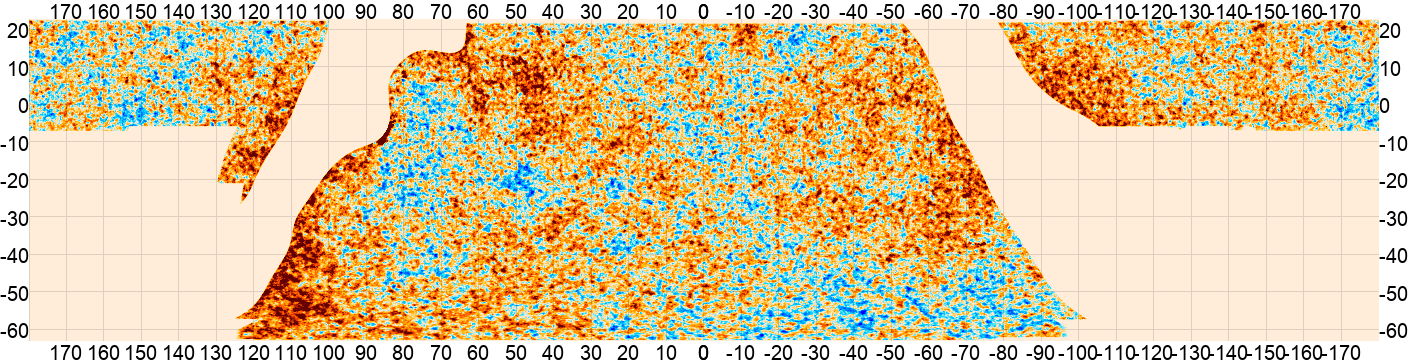

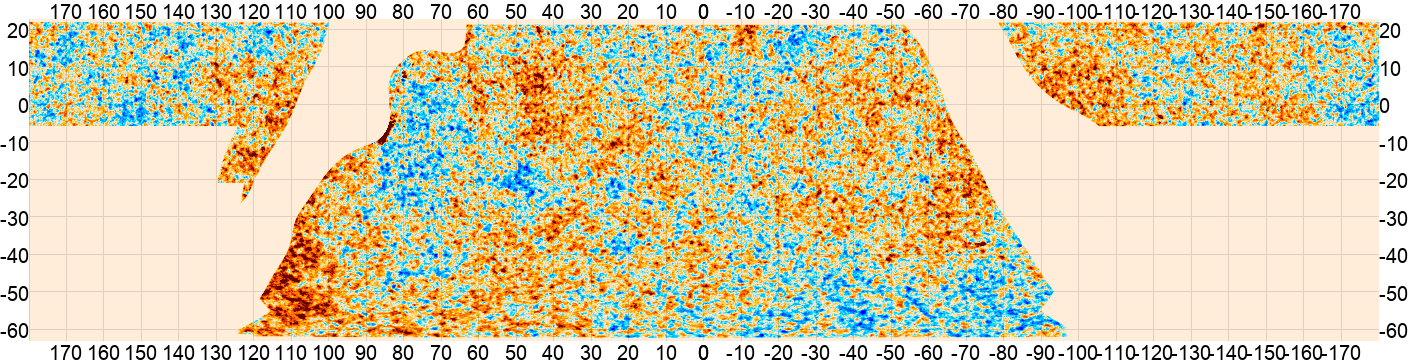

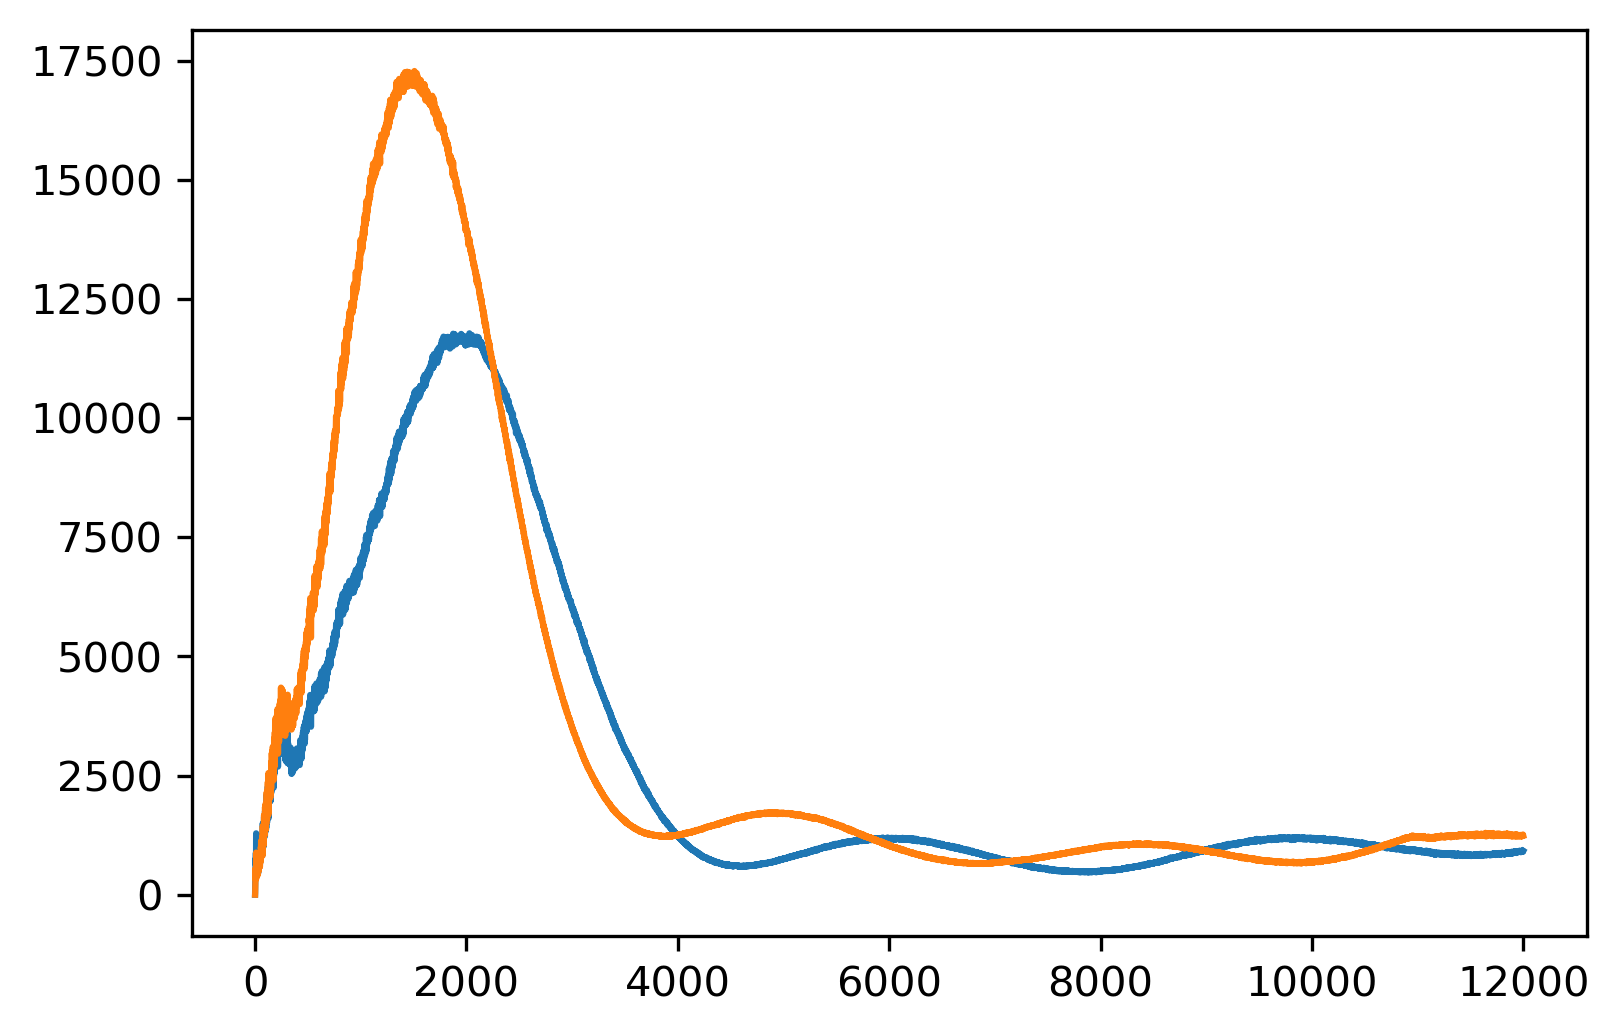

35.49052647241202 19.225382053886396 34126.60591193345


In [24]:
import pixell
from pixell import enmap, enplot
from pixell.curvedsky import alm2cl, map2alm

import healpy as hp

from astropy.wcs import WCS
from astropy.io import fits


import numpy as np
import matplotlib.pyplot as plt

LMAX=12000
R_LWIDTH=0.62
NTRIAL_NL = 1
NTRIAL_FL = 1
NITER_FL = 20

ells = np.arange(LMAX + 1)
norm = ells * (ells + 1) / 2 / np.pi

def map2cl(t_map, lmax=LMAX):
    return alm2cl(map2alm(t_map, lmax=lmax))

def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs))

data_path = '/home/aroman/data/'
planck_path = data_path + 'planck/'
mask_path = data_path + 'mask/'

act_path = data_path + 'act/'
map_path_150 = act_path + 'act_planck_s08_s19_cmb_f150_daynight_srcfree_map.fits'
map_path_90 = act_path + 'act_planck_s08_s19_cmb_f090_daynight_srcfree_map.fits'
ivar_path = act_path + 'act_planck_s08_s19_cmb_f150_daynight_srcfree_ivar.fits'
beam_path = act_path + 'beam_f150_daynight.txt'


# hdu = fits.open(map_path_150)[0]
# wcs = WCS(hdu.header)

# plt.subplot(projection=wcs)
# plt.imshow(hdu.data[0], vmin=-2.e-5, vmax=2.e-4, origin='lower')
# plt.grid(color='white', ls='solid')
# plt.xlabel('Galactic Longitude')
# plt.ylabel('Galactic Latitude')


# act_path = data_path + 'act_pub/'
# map_path = act_path + 'act_planck_dr5.01_s08s18_AA_f150_daynight_map_srcfree.fits'
# ivar_path = act_path + 'act_planck_dr5.01_s08s18_AA_f150_daynight_ivar.fits'
# beam_path = act_path + 'act_planck_dr5.01_s08s18_f150_daynight_beam.txt'

gal_mask_path = data_path + 'sdss_footprint/pixellized_sdss_north_completeness.fits'

planck_mask_inpath = planck_path + 'HFI_Mask_GalPlane-apo0_2048_R2.00.fits'
planck_enmask_path = mask_path + 'planck_foreground.npy'

catalog_path = data_path + 'vr_summaries/v01_sdss_cmass_north.h5'

kszpipe_path = data_path + 'kszpipe/sdss_dr12/cmass_north/'
kszpipe_cosmo_path = kszpipe_path + 'cosmology.pkl'
kszpipe_box_path = kszpipe_path + 'bounding_box.pkl'
kszpipe_d0_path = kszpipe_path + 'delta0_DR12v5_CMASS_North.h5'

print("importing mask: {}".format(planck_enmask_path))
        
#TODO: investigate weird mask normalization
planck_mask = np.load(planck_enmask_path)
mmin = planck_mask.min()
mmax = planck_mask.max()
print(f'planck mask range: {mmin} {mmax}')
assert mmin >= 0. and mmax <= 1 * (1 + 1e-6) # Check that one_time_setup was run
print(planck_mask.min(), planck_mask.max())

map_150 = enmap.read_map(map_path_150)[0] * planck_mask
map_90 = enmap.read_map(map_path_90)[0] * planck_mask

smap150 = enmap.downgrade(map_150, 32)
smap90 = enmap.downgrade(map_90, 32)
eshow(smap150,range=300, ticks=10)
eshow(smap90,range=300, ticks=10)

cl_150 = map2cl(map_150 - map_150.mean())
cl_90 = map2cl(map_90 - map_90.mean())

plt.figure(dpi=300)
plt.plot(ells, norm * cl_150)
plt.plot(ells, norm * cl_90)
plt.show()

# not sound, must weight by area element
mean_150 = map_150.mean()
mean_90 = map_90.mean()

mean_corr = ((map_150 - map_150.mean()) * (map_90 - map_90.mean())).mean()

print(mean_150, mean_90, mean_corr)